In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
review_data = pd.read_pickle("review_data.pkl")

In [3]:
# Stratified Test Train Spilt

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(review_data.Text,review_data.Sentiment,
                                                 test_size=0.3,stratify=review_data.Sentiment,
                                                 random_state=42)
X_train.shape

(254914,)

In [4]:
#Creating Bag of words(count) for our dataset

from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
final_counts = count_vector.fit_transform(X_train.values)
print(final_counts.shape)
# here final_counts is sparse representation of document

(254914, 96703)


In [5]:
# dictinary created by corpus

count_vector.get_feature_names()[-100:-120:-1]

['zoie',
 'zoid',
 'zohan',
 'zofchak',
 'zoey',
 'zoethout',
 'zoeie',
 'zoegas',
 'zoe',
 'zodiac',
 'zocor',
 'zo',
 'znaturalfoods',
 'zn',
 'zmtsa',
 'zloty',
 'zizzer',
 'ziyad',
 'ziwkpeak',
 'ziwipeaks']

In [10]:
print("dimention of single document is :",len(count_vector.get_feature_names()))

dimention of single document is : 96703


**Conclusion** : Our BOW represention of document is sparse and have very very large dimention
The dimensionality can be imporved by using method like stemming,remove stop words etc.

In [12]:
# Naive bayes as classifier 

from sklearn.naive_bayes import MultinomialNB

clf =  MultinomialNB()
clf.fit(final_counts,y_train)
print(clf.score(final_counts,y_train))
X_test_bow = count_vector.transform(X_test)
print(clf.score(X_test_bow,y_test))

0.9176271213036553
0.9099221967963387


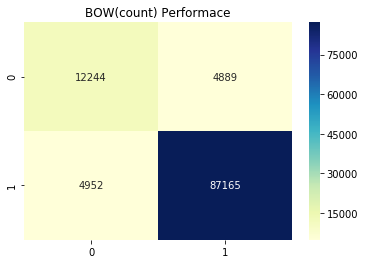

In [13]:
from sklearn.metrics import confusion_matrix

cnf = confusion_matrix(y_test,clf.predict(X_test_bow))
sns.heatmap(cnf,annot=True,fmt='g',cmap="YlGnBu");
plt.title("BOW(count) Performace");